In [29]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import os
from fonctions import *
from sklearn.preprocessing import normalize

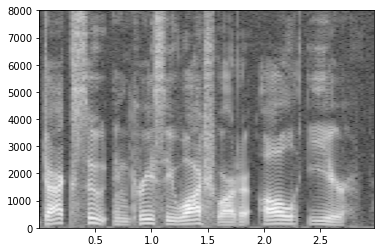

In [8]:
waveform, sample_rate = torchaudio.load("../Data/meme_taille_TEST/sig_1_10.WAV")
# spec_br, f_br, t_br, im_br = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = False, mode = 'magnitude', cmap = 'gray', scale='dB')
spec_br, f_br, t_br, im_br = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = False, mode = 'psd', cmap = 'gray', scale='dB')

array([[-0.08329424, -0.08050478, -0.08328995, ..., -0.07853746,
        -0.0813875 , -0.07891364],
       [-0.08791366, -0.08919798, -0.07654474, ..., -0.08321238,
        -0.08691   , -0.08230793],
       [-0.09165337, -0.09079203, -0.07212009, ..., -0.1011902 ,
        -0.10636467, -0.10037127],
       ...,
       [-0.09643767, -0.08691487, -0.07124445, ..., -0.09796009,
        -0.10249345, -0.09750975],
       [-0.10312367, -0.09460396, -0.075344  , ..., -0.09568466,
        -0.10133968, -0.09321263],
       [-0.10957382, -0.08219645, -0.07181298, ..., -0.0880135 ,
        -0.10803282, -0.08671815]])

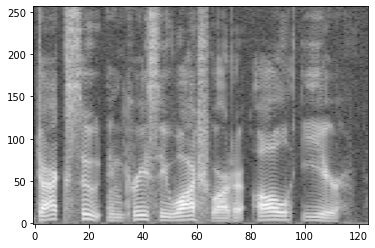

In [12]:

spec_db = 10*np.log10(spec_br)
# img = normalize(spec_db, norm='l2')
plt.imshow(spec_db, cmap='gray', aspect='auto', origin='lower')
spec_db
np.min(spec_db)
np.max(spec_db)
img
# plt.pcolormesh(t_br, f_br, spec_db, cmap='gray')

In [80]:
######################### MEME TAILLE DE SIGNAUX

# taille_sig("../Data/speech_TEST/TIMIT_TEST/DR1")
# taille_sig("../Data/speech_TEST/TIMIT_TEST/DR2")
# taille_sig("../Data/speech_TEST/TIMIT_TEST/DR3")
# taille_sig("../Data/speech_TEST/TIMIT_TEST/DR4")
# taille_sig("../Data/speech_TEST/TIMIT_TEST/DR5")
# taille_sig("../Data/speech_TEST/TIMIT_TEST/DR6")
# taille_sig("../Data/speech_TEST/TIMIT_TEST/DR7")
# taille_sig("../Data/speech_TEST/TIMIT_TEST/DR8")

In [33]:
####################### SIGNAUX NON BRUITÉS

# for subdir, dirs, files in os.walk("../Data/meme_taille_TEST"):
#     for file in files:
#             subpath = os.path.join(subdir, file)
#             waveform, sample_rate = torchaudio.load(subpath)
#             spec, f, t, im = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = True, mode = 'psd', cmap = 'gray')
            
#             #on ajoute le spectro au dossier
             
#             path_list = subpath.split("/")
#             br_name = 'nb_' + path_list[3][:-3] + 'npy'

#             np.save('../Data/sig/non_bruité/' + br_name, spec.astype(np.float32))

            
######################## BRUITAGE DES SIGNAUX

# RSB = input('entrer le RSB voulu')
# bruit, sample_rate_bruit = torchaudio.load("../Data/babble.wav")
# bruit_rs = torchaudio.transforms.Resample(sample_rate_bruit, 16000)(bruit)
# for subdir, dirs, files in os.walk("../Data/meme_taille_TEST"):
#     for file in files:
#         if ('.WAV' in file):
#             subpath = os.path.join(subdir, file)
#             save_bruit(subpath, bruit, bruit_rs, RSB)
   

In [1]:
# torch.cuda.is_available()
# print(torch.version.cuda)

In [80]:
############################### MISE EN PLACE DU CNN
import torch
from torch.autograd import Variable
from torch.optim import Adam, SGD

import torch.nn as nn
import torch.optim as optim

batch_size = 1
epochs = 20
learning_rate = 3e-4

In [81]:
############################## CRÉATION DU DATASET

import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import torchaudio
import numpy as np
import matplotlib.image as mpimg
from torch import tensor
import os
from torchvision.transforms import ToTensor
from PIL import Image 
from sklearn.preprocessing import normalize

#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)


def my_loader(filename):
    spec = np.load(filename)
    norm = np.max(spec) - np.min(spec)
    spec_db= -20*np.log10(spec/norm)
#     spec_db =normalize(spec_db)
    return spec_db.astype('float32')
    
# data = torchvision.datasets.DatasetFolder('../Data/test/Dataset/non_bruite', transform = ToTensor(), loader = my_loader, extensions = ".npy")
data_clear = torchvision.datasets.DatasetFolder('../Data/Spec_TEST_SNR_5/Clear/Modulus', transform = ToTensor(), loader = my_loader, extensions = ".npy")
data_noisy = torchvision.datasets.DatasetFolder('../Data/Spec_TEST_SNR_5/Noisy/Modulus', transform = ToTensor(), loader = my_loader, extensions = ".npy")

test_loader = torch.utils.data.DataLoader(data_noisy, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader_clear = torch.utils.data.DataLoader(data_clear, batch_size=batch_size, shuffle=False, pin_memory=True)

Device:  cuda


In [82]:
a=data_clear.__getitem__(0)
print(np.shape(a[0]))
# len(a[0][0][1])

print(a)

# it= iter(test_loader)
# next(it)


# np.shape(data_clear[0][1])
# data_clear[0]


# for [a,_],[b,_] in zip(test_loader, test_loader_clear):
#     print("a=",a)
#     print("b=",b)
    
# for batch_features, _ in test_loader:
#     print("batch_features=", batch_features)

torch.Size([1, 257, 124])
(tensor([[[ 56.9608,  53.2833,  53.1864,  ...,  65.8435,  57.8774,  55.3963],
         [ 64.1265,  57.8317,  59.8337,  ...,  67.5507,  60.2064,  65.2716],
         [ 72.7600,  71.7092,  71.2869,  ...,  61.5138,  68.4986,  68.6962],
         ...,
         [ 98.3061,  88.3050,  82.7871,  ...,  53.4165,  71.8081,  78.0530],
         [ 89.1312,  92.2936,  82.7334,  ...,  54.4706,  68.6531,  80.7551],
         [ 88.1403, 100.9824,  79.5345,  ...,  54.5545,  66.4025,  85.7461]]]), 0)


In [83]:
# path = '../Data/test/Dataset/'
# noisy = my_loader(path+'bruite/Data/b_sig_1_0.npy')
# clear = my_loader(path+'non_bruite/Data/nb_sig_1_0.npy')

# clear = my_loader('../Data/Spec_TEST/Clear/Modulus/Data/c_sig_2_0_mod.npy')
# noisy = my_loader('../Data/Spec_TEST/Noisy/Modulus/Data/n_sig_2_0_mod.npy')



# plt.figure(0)
# plt.imshow(clear, cmap='gray', aspect='auto', origin='lower')

# plt.figure(1)
# plt.imshow(noisy, cmap='gray', aspect='auto', origin='lower')


In [84]:
import torch.nn as nn
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer1 = nn.Conv2d(
            in_channels=1, out_channels=25, kernel_size=(50, 25)
        )
        self.encoder_hidden_layer2 = nn.Conv2d(
            in_channels=25, out_channels=200, kernel_size=(10, 5)
        )
        self.poolp = nn.MaxPool2d(
            kernel_size=2, padding=(1,1)
        )
        self.pool = nn.MaxPool2d(
            kernel_size=2
        )
        self.decoder_hidden_layer = nn.ConvTranspose2d(
            in_channels=200, out_channels=25, kernel_size=(10, 5), stride=3
        )
        self.decoder_output_layer = nn.ConvTranspose2d(
            in_channels=25, out_channels=1, kernel_size=(50, 25), stride=3
        )

        
#     def __init__(self, **kwargs):
#         super().__init__()
#         self.encoder_hidden_layer1 = nn.Conv2d(
#             in_channels=1, out_channels=10, kernel_size=(15, 15)
#         )
#         self.encoder_hidden_layer2 = nn.Conv2d(
#             in_channels=10, out_channels=20, kernel_size=(15, 15)
#         )
#         self.poolp = nn.MaxPool2d(
#             kernel_size=2, padding=(1,1)
#         )
#         self.pool = nn.MaxPool2d(
#             kernel_size=2
#         )
#         self.decoder_hidden_layer = nn.ConvTranspose2d(
#             in_channels=20, out_channels=10, kernel_size=(15, 15), stride=3
#         )
#         self.decoder_output_layer = nn.ConvTranspose2d(
#             in_channels=10, out_channels=1, kernel_size=(15, 15), stride=3
#         )
        
        ## a chaque couche il faudrait normaliser
        
        
#     def forward(self, features):
#         print("features", features.size())
#         norm = nn.BatchNorm2d(features.size()[1]).to(device)
#         f_norm = norm(features)
        
#         activation = self.encoder_hidden_layer1(f_norm)
#         activation = torch.relu(activation)
#         print("couche conv 1", activation.size())
#         code = self.pool(activation)
#         code = torch.relu(code)
#         print("couche maxpool 1", code.size())

#         norm = nn.BatchNorm2d(code.size()[1]).to(device)
#         f_norm = norm(code)
        
#         activation = self.encoder_hidden_layer2(f_norm)
#         activation = torch.relu(activation)
#         print("couche conv 2", activation.size())
#         code = self.poolp(activation)
#         code = torch.relu(code)
#         print("couche maxpool 2", code.size())

#         norm = nn.BatchNorm2d(code.size()[1]).to(device)
#         f_norm = norm(code)
        
#         activation = self.decoder_hidden_layer(f_norm)
#         activation = torch.relu(activation)
#         print("couche decode 1", activation.size())

#         norm = nn.BatchNorm2d(activation.size()[1]).to(device)
#         f_norm = norm(activation)

#         reconstructed = self.decoder_output_layer(f_norm)
#         reconstructed = torch.relu(reconstructed)
#         print("couche decode 2", reconstructed.size())
        
# #         print(features.size()[0], features.size()[1], features.size()[2], features.size()[3])
        
#         cropped = reconstructed[:, :, 0:features.size()[2], 0:features.size()[3]]
# #         cropped = reconstructed[0:features.size()[0], 0:features.size()[1]]

# #         print("couche decode 2 crop", cropped.size())
#         return cropped




    def forward(self, features):
#         print("features", features.size())

        activation = self.encoder_hidden_layer1(features)
        activation = torch.relu(activation)
#         print("couche conv 1", activation.size())
        code = self.pool(activation)
        code = torch.relu(code)
#         print("couche maxpool 1", code.size())

        activation = self.encoder_hidden_layer2(code)
        activation = torch.relu(activation)
#         print("couche conv 2", activation.size())
        code = self.pool(activation)
        code = torch.relu(code)
#         print("couche maxpool 2", code.size())

        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
#         print("couche decode 1", activation.size())

        reconstructed = self.decoder_output_layer(activation)
        reconstructed = torch.relu(reconstructed)
#         print("couche decode 2", reconstructed.size())

#         print(features.size()[0], features.size()[1], features.size()[2], features.size()[3])

        cropped = reconstructed[:, :, 0:features.size()[2], 0:features.size()[3]]

#         print("couche decode 2 crop", cropped.size())
        return cropped

In [85]:
# #  use gpu if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if (device == "cuda"):
    torch.cuda.empty_cache()

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE().to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# mean-squared error loss
criterion = nn.MSELoss()

In [86]:
for epoch in range(epochs):
    loss = 0
#     for batch_features, _ in test_loader:
    for [batch_features,_],[batch_features_clear,_] in zip(test_loader, test_loader_clear):
        batch_features = batch_features.to(device)
        batch_features_clear = batch_features_clear.to(device)
#         print(batch_features.type())
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        # compute reconstructions
#         outputs = model(torch.tensor(batch_features, device=device))
        outputs = model(batch_features.clone().detach())


#         outputs = model(batch_features)

#         print(outputs.size())
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features_clear)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(test_loader)
    
    # save the weigth
    torch.save(model.state_dict(), "model/model"+str(epoch)+".pt")
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))

epoch : 1/20, recon loss = 300.00044429
epoch : 2/20, recon loss = 261.38860340
epoch : 3/20, recon loss = 252.41810558
epoch : 4/20, recon loss = 248.11148389
epoch : 5/20, recon loss = 243.98203759
epoch : 6/20, recon loss = 241.40928451
epoch : 7/20, recon loss = 239.46951883
epoch : 8/20, recon loss = 238.40464926
epoch : 9/20, recon loss = 237.37287803
epoch : 10/20, recon loss = 236.59083818
epoch : 11/20, recon loss = 235.86640489
epoch : 12/20, recon loss = 235.03007045
epoch : 13/20, recon loss = 234.25773769
epoch : 14/20, recon loss = 233.37687806
epoch : 15/20, recon loss = 232.94951004
epoch : 16/20, recon loss = 232.65463994
epoch : 17/20, recon loss = 232.38039140
epoch : 18/20, recon loss = 232.05769082
epoch : 19/20, recon loss = 231.77550462
epoch : 20/20, recon loss = 231.46277599


In [87]:
# np.shape(batch_features)

In [88]:
########################### Prédiction


#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE().to(device)

# load model
model.load_state_dict(torch.load("model/model9.pt"))
model.eval()

with torch.no_grad():
    i=0
    for batch_features, _ in test_loader:
        batch_features = batch_features.to(device)
#         print(type(batch_features))
        outputs = model(batch_features.clone().detach())
#         print(type(outputs))
        np.save('../Data/test/Predict/output_' + str(i) + '.npy', outputs.cpu().numpy().astype(np.float32))
        i+=1









In [89]:

# import matplotlib.pyplot as plt

# from scipy.io import wavfile
# import scipy.signal as signal
# import numpy as np

# import numpy as np
# from scipy import signal
# from math import sin, pi
# import random
# import typing
# from scipy.io.wavfile import write





# #### Il faut normaliser les spectrogramme et en dB !!


# def inverse_spectrogram(f: np.ndarray, t: np.ndarray, Sxx: np.ndarray, fs: int) -> np.ndarray:
#     """inverse_spectrogram calculates the inverse spectrogram
# from frequencies f, intervals t, magnitude matrix Sxx using the sample rate fs.
# Returns signal as a np.array
#     """
#     #you can not hear the phase they say
#     phases = [random.uniform(0,2*pi) for j in range(len(f))]
#     #that +1 is here for off by one rounding errors i dont care to chase
#     length= int(t[-1]*fs+1)
#     #time axis
#     out = np.zeros(length)
#     for i in range(1,len(t)):
#         duration = t[i] - t[i-1]
#         start =  t[i-1] * fs
#         tics = int(duration*fs)
#         for tic in range(tics):
#             index = int(start + tic)
#             #frequency axis
#             for j in range(len(f)):
#                 magnitude = Sxx[j][i]
#                 #everyone loves the sin, because it starts from the zero
#                 out[index] += sin(2*pi/fs*f[j]*index+ phases[j]) * magnitude
#     return out
# name = "output_1"
# path = "../Data/test/Predict/"
# spec1 = np.load(path+name+".npy")

# waveform, sample_rate = torchaudio.load("../Data/meme_taille_TEST/sig_1_10.WAV")
# spec, f_br, t_br, im_br = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = False, mode = 'magnitude', cmap = 'gray', scale='dB')


# # spec = 20 * 10*np.log10(spec)


# sig = inverse_spectrogram(f_br, t_br, spec1[0][0], sample_rate)
# # sig = inverse_spectrogram(f_br, t_br, spec, sample_rate)

# plt.plot(sig, scaley=True)
# # np.shape(spec)
# write(path+name+".wav",sample_rate,sig)

In [90]:
# plt.imshow(spec)
# plt.plot(sig, scaley=True)

73.07681

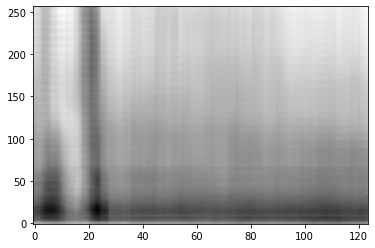

In [91]:
name = "output_1"
path = "../Data/test/Predict/"
spec = np.load(path+name+".npy")
plt.imshow(spec[0][0], cmap='gray', aspect='auto', origin='lower')
np.max(spec[0][0])

In [90]:
loss = nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)
print(output)
output.backward()
print(input)
print(target)
print(output)


tensor(4.1902, grad_fn=<MseLossBackward>)
tensor([[ 1.3348, -1.0891, -0.1052, -1.7645,  2.0842],
        [ 1.2203, -1.5004,  0.2413, -1.4578, -1.0256],
        [-1.3972, -1.8732,  1.2943, -0.9736, -1.2789]], requires_grad=True)
tensor([[-0.8554,  1.7192, -0.1993, -0.0141, -2.4258],
        [-0.4642,  1.8546, -1.2864, -0.5771, -0.8918],
        [ 0.3961, -0.2024,  0.5964,  0.4824, -0.3192]])
tensor(4.1902, grad_fn=<MseLossBackward>)


torch.Size([1, 48000])
(2, 47232)


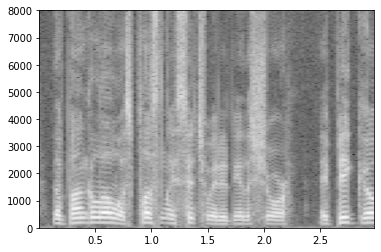

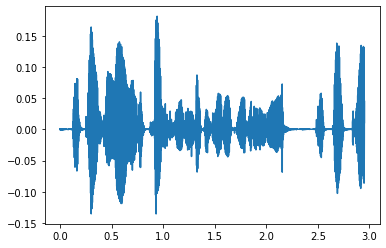

In [91]:
from scipy.signal import istft
import cmath
from scipy.io.wavfile import write
nprect = np.vectorize(cmath.rect)


waveform, sample_rate = torchaudio.load("../Data/meme_taille_TEST/sig_1_0.WAV")
phase, f_br, t_br, im_br = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = False, mode = 'phase', cmap = 'gray')
magnitude, f_br, t_br, im_br = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = False, mode = 'magnitude', cmap = 'gray')

spec = nprect(magnitude, phase)

sig = istft(spec, fs=sample_rate, nfft=512, nperseg=512, noverlap=128)
print(np.shape(waveform))
print(np.shape(sig))

plt.figure(0)
plt.plot(sig[0], sig[1])

write("coucou.wav",sample_rate,sig[1])

In [92]:
magnitude

array([[5.43234248e-05, 8.29582544e-05, 8.38893174e-05, ...,
        1.95365375e-05, 4.88824380e-05, 6.50441596e-05],
       [2.38067911e-05, 4.91405066e-05, 3.90247153e-05, ...,
        1.60504764e-05, 3.73857665e-05, 2.08662979e-05],
       [8.81097338e-06, 9.94406378e-06, 1.04395298e-05, ...,
        3.21614934e-05, 1.43911072e-05, 1.40674604e-05],
       ...,
       [4.65284132e-07, 1.47155123e-06, 2.77760435e-06, ...,
        8.16955523e-05, 9.83151974e-06, 4.79044387e-06],
       [1.33802595e-06, 9.29702596e-07, 2.79482184e-06, ...,
        7.23590284e-05, 1.41373782e-05, 3.50967829e-06],
       [1.49971451e-06, 3.41903107e-07, 4.03924860e-06, ...,
        7.16641372e-05, 1.83188641e-05, 1.97570442e-06]])

In [93]:
norm = (np.max(magnitude)-np.min(magnitude))
mag_norm = magnitude/norm
mag_norm

array([[1.41893447e-03, 2.16687970e-03, 2.19119918e-03, ...,
        5.10296737e-04, 1.27681523e-03, 1.69896136e-03],
       [6.21836280e-04, 1.28355601e-03, 1.01933031e-03, ...,
        4.19240397e-04, 9.76520771e-04, 5.45030241e-04],
       [2.30143697e-04, 2.59740156e-04, 2.72681789e-04, ...,
        8.40062121e-04, 3.75897471e-04, 3.67443776e-04],
       ...,
       [1.21532782e-05, 3.84370973e-05, 7.25513637e-05, ...,
        2.13389777e-03, 2.56800492e-04, 1.25126977e-04],
       [3.49494005e-05, 2.42839449e-05, 7.30010866e-05, ...,
        1.89002663e-03, 3.69270040e-04, 9.16732239e-05],
       [3.91727255e-05, 8.93055077e-06, 1.05505665e-04, ...,
        1.87187598e-03, 4.78490958e-04, 5.16056398e-05]])

In [94]:
mag_db = 20*np.log10(mag_norm)
mag_db

array([[ -56.96075324,  -53.28330398,  -53.18636287, ...,  -65.84354418,
         -57.87743892,  -55.39632994],
       [ -64.12647887,  -57.8317035 ,  -59.83370122, ...,  -67.55073753,
         -60.2063703 ,  -65.27158801],
       [ -72.7600183 ,  -71.70921806,  -71.2868773 , ...,  -61.51377195,
         -68.49861193,  -68.69618208],
       ...,
       [ -98.30613125,  -88.30498835,  -82.7870884 , ...,  -53.41652782,
         -71.80808297,  -78.05298097],
       [ -89.13120539,  -92.29361521,  -82.73341351, ...,  -54.47064155,
         -68.65311853,  -80.7551499 ],
       [ -88.14032422, -100.98243513,  -79.53448442, ...,  -54.55445855,
         -66.40252529,  -85.74605666]])

array([[1.41893447e-03, 2.16687970e-03, 2.19119918e-03, ...,
        5.10296737e-04, 1.27681523e-03, 1.69896136e-03],
       [6.21836280e-04, 1.28355601e-03, 1.01933031e-03, ...,
        4.19240397e-04, 9.76520771e-04, 5.45030241e-04],
       [2.30143697e-04, 2.59740156e-04, 2.72681789e-04, ...,
        8.40062121e-04, 3.75897471e-04, 3.67443776e-04],
       ...,
       [1.21532782e-05, 3.84370973e-05, 7.25513637e-05, ...,
        2.13389777e-03, 2.56800492e-04, 1.25126977e-04],
       [3.49494005e-05, 2.42839449e-05, 7.30010866e-05, ...,
        1.89002663e-03, 3.69270040e-04, 9.16732239e-05],
       [3.91727255e-05, 8.93055077e-06, 1.05505665e-04, ...,
        1.87187598e-03, 4.78490958e-04, 5.16056398e-05]])

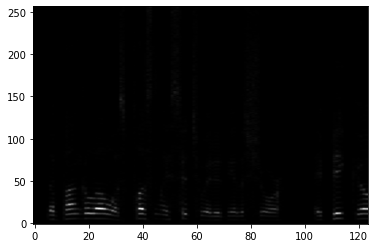

In [95]:
a = 10**(mag_db/20)
plt.imshow(a, cmap='gray', aspect='auto', origin='lower')
a

In [96]:
b = a * norm 
b

array([[5.43234248e-05, 8.29582544e-05, 8.38893174e-05, ...,
        1.95365375e-05, 4.88824380e-05, 6.50441596e-05],
       [2.38067911e-05, 4.91405066e-05, 3.90247153e-05, ...,
        1.60504764e-05, 3.73857665e-05, 2.08662979e-05],
       [8.81097338e-06, 9.94406378e-06, 1.04395298e-05, ...,
        3.21614934e-05, 1.43911072e-05, 1.40674604e-05],
       ...,
       [4.65284132e-07, 1.47155123e-06, 2.77760435e-06, ...,
        8.16955523e-05, 9.83151974e-06, 4.79044387e-06],
       [1.33802595e-06, 9.29702596e-07, 2.79482184e-06, ...,
        7.23590284e-05, 1.41373782e-05, 3.50967829e-06],
       [1.49971451e-06, 3.41903107e-07, 4.03924860e-06, ...,
        7.16641372e-05, 1.83188641e-05, 1.97570442e-06]])

torch.Size([1, 48000])
(2, 47232)


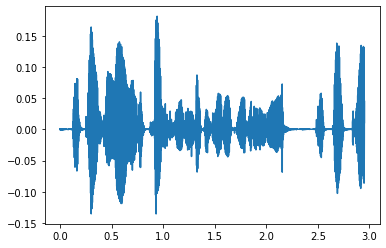

In [97]:
spec = nprect(b, phase)
sig = istft(spec, fs=sample_rate, nfft=512, nperseg=512, noverlap=128)
print(np.shape(waveform))
print(np.shape(sig))

plt.figure(0)
plt.plot(sig[0], sig[1])

write("coucou_n.wav",sample_rate,sig[1])

torch.Size([1, 48000])
(2, 47232)


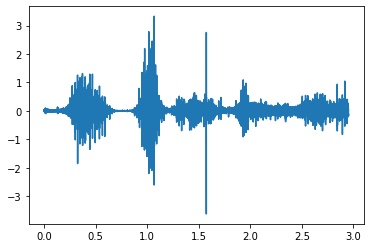

In [98]:
from scipy.signal import istft
import cmath
from scipy.io.wavfile import write
nprect = np.vectorize(cmath.rect)


spec_db = np.load("../Data/test/Predict/output_1.npy")[0][0]
magnitude = 10**(-spec_db/20)
phase = np.load("../Data/Spec_TEST_SNR_5/Noisy/Phase/n_sig_1_0_phi.npy")

waveform, sample_rate = torchaudio.load("../Data/meme_taille_TEST/sig_1_0.WAV")
# phase, f_br, t_br, im_br = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = False, mode = 'phase', cmap = 'gray')
# magnitude, f_br, t_br, im_br = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = False, mode = 'magnitude', cmap = 'gray')

spec = nprect(magnitude, phase)

sig = istft(spec, fs=sample_rate, nfft=512, nperseg=512, noverlap=128)
print(np.shape(waveform))
print(np.shape(sig))

plt.figure(0)
plt.plot(sig[0], sig[1])

write("coucou_den.wav",sample_rate,sig[1])